In [1]:
import nltk
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [79]:
import string
from nltk import ngrams

In [75]:
from nltk.book import *

In [4]:
import statistics

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
latlib_df = pd.read_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data/latinlibrary_data.pkl")

In [7]:
ne_df = pd.read_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data/latinlibrary_ne_data.pkl")

In [8]:
#here's some of the data:
latlib_df.head()

,title,text,text_raw,tokens,token_count
0,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1768
1,Tibullus Book III,LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE Mar...,"[LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE, \n,...","[LIBER, TERTIVS, LYGDAMI, ALIORVMQUE, ELEGIAE,...",4395
2,Tibullus Book II,A. TIBVLLI ELEGIAE LIBER SECVNDVS Quisquis a...,"[A. TIBVLLI ELEGIAE LIBER SECVNDVS, \n, \n, \n...","[A, TIBVLLI, ELEGIAE, LIBER, SECVNDVS, Quisqui...",2747
3,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1933
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075


In [9]:
ne_df.head()

,name,era
0,ALBIVS TIBVLLVS,(c. 54 – 19 B.C.)
1,L. ANNAEVS SENECA MAIOR,(54 B.C. – 39 A.D.)
2,SVLPICIA,(late 1st century B.C.)
3,PVBLIVS PAPINIVS STATIVS,(c. 45 – 96 A.D.)
4,C. SALLVSTIVS CRISPVS,(86 – 34 B.C.)


Here's some basic info on the data contained in latlib_df:

In [10]:
#overall shape of the dataframe:
latlib_df.shape

(673, 5)

In [11]:
latlib_df.describe()

,token_count
count,673.000000
mean,5273.719168
std,4614.407803
min,0.000000
25%,1434.000000
50%,4691.000000
75%,7257.000000
max,30592.000000


In [12]:
latlib_df.info()
#good! no null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        673 non-null    object
 1   text         673 non-null    object
 2   text_raw     673 non-null    object
 3   tokens       673 non-null    object
 4   token_count  673 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.4+ KB


let's work on seperating works by style (prose or poetry):

In [13]:
#use Aeneid (P. VERGILI MARONIS AENEIDOS) + Ovid's Metamorphoses (P. OVIDI NASONIS METAMORPHOSEON) for verse examples

In [14]:
metamorphoses_ovid = latlib_df[latlib_df['text'].str.contains('P. OVIDI NASONIS METAMORPHOSEON')]

In [15]:
aeneid = latlib_df[latlib_df['text'].str.contains('P. VERGILI MARONIS AENEIDOS')]

In [16]:
aeneid

,title,text,text_raw,tokens,token_count
608,P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS,P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS ...,[P. VERGILI MARONIS AENEIDOS LIBER DVODECIMVS\...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, DVODECI...",6201
609,P. VERGILI MARONIS AENEIDOS LIBER DECIMVS,P. VERGILI MARONIS AENEIDOS LIBER DECIMVS Pan...,"[P. VERGILI MARONIS AENEIDOS LIBER DECIMVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, DECIMVS...",5905
610,P. VERGILI MARONIS AENEIDOS LIBER NONVS,P. VERGILI MARONIS AENEIDOS LIBER NONVS Atque...,"[P. VERGILI MARONIS AENEIDOS LIBER NONVS\n, \n...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, NONVS, ...",5300
611,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS Ut ...,[P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS\n\n...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, OCTAVVS...",4639
612,P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS,P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS Tu...,"[P. VERGILI MARONIS AENEIDOS LIBER SEPTIMVS\n,...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, SEPTIMV...",5224
613,P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS,P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS O...,[P. VERGILI MARONIS AENEIDOS LIBER VNDECIMVS\n...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, VNDECIM...",5923
614,Aeneid IV,P. VERGILI MARONIS AENEIDOS LIBER QVARTVS At ...,"[P. VERGILI MARONIS AENEIDOS LIBER QVARTVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, QVARTVS...",4580
615,P. VERGILI MARONIS AENEIDOS LIBER SEXTVS,P. VERGILI MARONIS AENEIDOS LIBER SEXTVS Sic ...,"[P. VERGILI MARONIS AENEIDOS LIBER SEXTVS\n, \...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, SEXTVS,...",5856
616,P. VERGILI MARONIS AENEIDOS LIBER QVINTVS,P. VERGILI MARONIS AENEIDOS LIBER QVINTVS Int...,"[P. VERGILI MARONIS AENEIDOS LIBER QVINTVS\n, ...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, QVINTVS...",5565
617,P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS,P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS Co...,"[P. VERGILI MARONIS AENEIDOS LIBER SECVNDVS\n,...","[P, VERGILI, MARONIS, AENEIDOS, LIBER, SECVNDV...",5178


In [17]:
[len(x) for x in aeneid.text_raw]
#this gets me how many lines per-work there are 

[964, 920, 825, 741, 833, 924, 715, 905, 880, 811, 767, 727]

In [18]:
count = 0
for i in aeneid.text_raw:
    count += len(i)
print(count) #this is how many lines are in the aeneid in total

10012


In [19]:
def MaxLineLength(l):
    return(len(max(l, key=len)))

In [20]:
max(aeneid.text_raw.map(MaxLineLength))
#so the longest line is 87 characters long, that's my threshold for a verse line (depending on Ovid I guess)

87

In [21]:
max(metamorphoses_ovid.text_raw.map(MaxLineLength)) #yep, 87 it is!

81

now to actually use that number to quantify prose v. verse!

In [22]:
latlib_df['max_line_length'] = latlib_df.text_raw.map(MaxLineLength)

In [23]:
latlib_df.head(5)

,title,text,text_raw,tokens,token_count,max_line_length
0,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1768,2045
1,Tibullus Book III,LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE Mar...,"[LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE, \n,...","[LIBER, TERTIVS, LYGDAMI, ALIORVMQUE, ELEGIAE,...",4395,70
2,Tibullus Book II,A. TIBVLLI ELEGIAE LIBER SECVNDVS Quisquis a...,"[A. TIBVLLI ELEGIAE LIBER SECVNDVS, \n, \n, \n...","[A, TIBVLLI, ELEGIAE, LIBER, SECVNDVS, Quisqui...",2747,56
3,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1933,1165
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075,71


In [24]:
latlib_df.drop(latlib_df.index[latlib_df['token_count']<=10], inplace=True)


In [25]:
def Poems(l):
    if l <= 87:
        return('verse')
    else:
        return('prose')


In [26]:
latlib_df['style'] = latlib_df.max_line_length.map(Poems)

## below I'm going to add the aspects of ne_df to latlib_df for easier analysis:

In [27]:
ne_df['name'] = [w[:-2] for w in ne_df.name]

In [28]:
def MatchName(l):
    for name in ne_df.name:
        last_word = name.split()[len(name.split()) - 1]
        if last_word in l:
            return name
            return "None"

In [29]:
latlib_df['author'] = latlib_df.text.map(MatchName)

to put the eras in the main df it's not going to be elegant, but I want to move on with my analysis so I'm going to merge the info into a new column for an easier method:

In [30]:
ne_df['merged'] = ne_df['era']+ne_df['name']

In [31]:
def MatchEra(l):
    for x in ne_df.merged:
        last_word = x.split()[len(x.split()) - 1]
        if last_word in l:
            clean = re.compile(r'\)\w* \w* \w*|\)\w* \w*|\)\w+\. \w* \w*|\)\w+|\(')
            return(clean.sub(' ', x))
        

In [32]:
latlib_df['life_span'] = latlib_df.text.map(MatchEra)

In [33]:
latlib_df = latlib_df.fillna('none') #just in case, I think there's some Suetonius that's wonky

That wasn't very pretty, but it did the trick and now the df itself looks nice!

In [34]:
latlib_df.sample(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span
325,Eutropius: Book II,EVTROPII BREVIARIVM LIBER SECVNDVS ...,"[EVTROPII BREVIARIVM LIBER SECVNDVS\n, \n, , ...","[EVTROPII, BREVIARIVM, LIBER, SECVNDVS, 1, Ann...",2225,377,prose,C. PLINIVS CAECILIVS SECVND,63 – c. 113 A.D. SECVND
484,Nepos: Life of Phocion,CORNELI NEPOTIS PHOCION [1] PHOCION Atheniens...,"[CORNELI NEPOTIS PHOCION\n\n, \n[1] PHOCION A...","[CORNELI, NEPOTIS, PHOCION, 1, PHOCION, Atheni...",547,336,prose,CORNELIVS NEP,c. 100 – 24 B.C.
142,Seneca: On Tranquility of the Mind,L. ANNAEI SENECAE AD SERENVM DE TRANQUILLITATE...,[L. ANNAEI SENECAE AD SERENVM DE TRANQUILLITAT...,"[L, ANNAEI, SENECAE, AD, SERENVM, DE, TRANQUIL...",6946,752,prose,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65
195,Tacitus: Annales III,P. CORNELI TACITI ANNALIVM LIBER TERTIVS ...,"[P. CORNELI TACITI ANNALIVM LIBER TERTIVS\n, \...","[P, CORNELI, TACITI, ANNALIVM, LIBER, TERTIVS,...",9274,1946,prose,P. CORNELIVS TACIT,c. 56 – c. 117 A.D.
369,Horace: Carmen Saeculare,Q. HORATII FLACCI CARMEN SAECVLARE Phoebe silv...,"[Q. HORATII FLACCI CARMEN SAECVLARE\n, \nPhoeb...","[Q, HORATII, FLACCI, CARMEN, SAECVLARE, Phoebe...",316,52,verse,GAIVS VALERIVS FLACC,died c. 90 A.D.


let's split life spans into actual eras (Golden Age, Silver Age, Later):

In [35]:
def SortEra(l):
    if 'B.C.' in l and 'A.D.' not in l:
        return('Golden Age')
    elif 'A.D.' in l and 'B.C.' not in l:
        if 'century' in l:
            if '3' in l or '4' in l:
                return('Later')
            elif '1' in l or '2' in l:
                return('Silver Age')
        elif 'century' not in l:
            if '404' in l or '180' in l: #this does feel kind of like cheating but tbh I just needed something to work
                return('Later')
            else:
                return("Silver Age")
    elif 'B.C.' in l and 'A.D.' in l:
        return('Gold and Silver Ages')

        #return('silver and later')
    else:
        return('none')

In [36]:
latlib_df['era'] = latlib_df.life_span.map(SortEra)

Here's a visual representation of the era split:

In [37]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(latlib_df[latlib_df.era=='Golden Age'])
S = len(latlib_df[latlib_df.era=='Silver Age'])
L = len(latlib_df[latlib_df.era=='Later'])
GaS = len(latlib_df[latlib_df.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

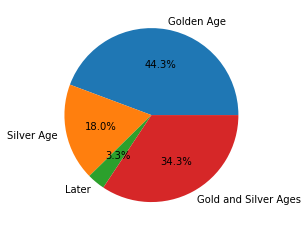

In [38]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

## sword word analysis:

In [39]:
#latlib_df['term'] = ''

In [40]:
#gladius:
gladius = latlib_df[(latlib_df.text.str.contains(pat = 'gladius', case=False)) | (latlib_df.text.str.contains(pat = 'gladii', case=False)) | (latlib_df.text.str.contains(pat = 'gladi', case=False)) | (latlib_df.text.str.contains(pat = 'gladio', case=False)) | (latlib_df.text.str.contains(pat = 'gladium', case=False)) | (latlib_df.text.str.contains(pat = 'gladie', case=False)) | (latlib_df.text.str.contains(pat = 'gladiorum', case=False)) | (latlib_df.text.str.contains(pat = 'gladiis', case=False)) | (latlib_df.text.str.contains(pat = 'gladios', case=False))]

In [41]:
#ferrum:
ferrum = latlib_df[(latlib_df.text.str.contains(pat = 'ferrum', case=False)) | (latlib_df.text.str.contains(pat = 'ferri', case=False)) | (latlib_df.text.str.contains(pat = 'ferro', case=False)) | (latlib_df.text.str.contains(pat = 'ferra', case=False)) | (latlib_df.text.str.contains(pat = 'ferrorum', case=False)) | (latlib_df.text.str.contains(pat = 'ferris', case=False))]

In [42]:
#mucro:
mucro = latlib_df[(latlib_df.text.str.contains(pat = 'mucro', case=False)) | (latlib_df.text.str.contains(pat = 'mucronis', case=False)) | (latlib_df.text.str.contains(pat = 'mucroni', case=False)) | (latlib_df.text.str.contains(pat = 'mucronem', case=False)) | (latlib_df.text.str.contains(pat = 'mucrone', case=False)) | (latlib_df.text.str.contains(pat = 'mucrones', case=False)) | (latlib_df.text.str.contains(pat = 'mucronum', case=False)) | (latlib_df.text.str.contains(pat = 'mucronibus', case=False))]

In [43]:
#ensis:
ensis = latlib_df[(latlib_df.text.str.contains(pat = 'ensis', case=False)) | (latlib_df.text.str.contains(pat = 'ensi', case=False)) | (latlib_df.text.str.contains(pat = 'ensem', case=False)) | (latlib_df.text.str.contains(pat = 'ense', case=False)) | (latlib_df.text.str.contains(pat = 'enses', case=False)) | (latlib_df.text.str.contains(pat = 'ensium', case=False)) | (latlib_df.text.str.contains(pat = 'ensibus', case=False))]

In [44]:
#capulus:
capulus = latlib_df[(latlib_df.text.str.contains(pat = 'capulus', case=False)) | (latlib_df.text.str.contains(pat = 'capuli', case=False)) | (latlib_df.text.str.contains(pat = 'capulo', case=False)) | (latlib_df.text.str.contains(pat = 'capulum', case=False)) | (latlib_df.text.str.contains(pat = 'capulorum', case=False)) | (latlib_df.text.str.contains(pat = 'capulis', case=False)) | (latlib_df.text.str.contains(pat = 'capulos', case=False))]

In [45]:
#let's see how many occurences of each word there are:
print('gladius: ',len(gladius))
print('ferrum: ',len(ferrum))
print('mucro: ',len(mucro))
print('ensis: ',len(ensis))
print('capulus: ',len(capulus)) #'capulus' is the least common, only appearing 48 times, let's look at that data!

gladius:  278
ferrum:  463
mucro:  90
ensis:  574
capulus:  48


In [46]:
capulus.head()

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075,71,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age
23,Plautus: Truculentus,T. MACCI PLAVTI TRVCVLENTVS res u...,"[T. MACCI PLAVTI TRVCVLENTVS, \n, \n, \n, \n, ...","[T, MACCI, PLAVTI, TRVCVLENTVS, res, unam, per...",8025,84,verse,T. MACCIVS PLAVT,born c. 254 B.C.,Golden Age
26,Plautus: Trinummus,T. MACCI PLAVTI TRINVMMVS hensa...,"[T. MACCI PLAVTI TRINVMMVS, \n, \n, \n, \n, \n...","[T, MACCI, PLAVTI, TRINVMMVS, hensaurum, abstr...",9529,104,prose,T. MACCIVS PLAVT,born c. 254 B.C.,Golden Age
34,Plautus: Epidicus,T. MACCI PLAVTI EPIDICVS EPIDICVS SERVVS THE...,"[T. MACCI PLAVTI EPIDICVS, \n, \n, \nEPIDICVS ...","[T, MACCI, PLAVTI, EPIDICVS, EPIDICVS, SERVVS,...",6066,119,prose,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages
36,Plautus: Casina,T. MACCI PLAVTI CASINA OLYMPIO VILICVS CHALI...,"[T. MACCI PLAVTI CASINA\n, \n, \n, \nOLYMPIO V...","[T, MACCI, PLAVTI, CASINA, OLYMPIO, VILICVS, C...",7309,84,verse,L. ANNAEVS SENE,c. 4 B.C. – A.D. 65,Gold and Silver Ages


Just from looking at these titles there's a pretty fair distribution of genre between the works (some philosophy, epic poetry, history, and even comedy plays!)

In [47]:
print(len(gladius[gladius['style']=='prose'])/len(gladius)*100)
print(len(gladius[gladius['style']=='verse'])/len(gladius)*100)
#the results here are skewed highly in favor of prose

79.85611510791367
20.14388489208633


In [48]:
print(len(ferrum[ferrum['style']=='prose'])/len(ferrum)*100)
print(len(ferrum[ferrum['style']=='verse'])/len(ferrum)*100)
#here there's more in the prose category

66.95464362850973
33.04535637149028


In [49]:
print(len(mucro[mucro['style']=='prose'])/len(mucro)*100)
print(len(mucro[mucro['style']=='verse'])/len(mucro)*100)
#it's closer here, but still in favor of prose

65.55555555555556
34.44444444444444


In [50]:
print(len(ensis[ensis['style']=='prose'])/len(ensis)*100)
print(len(ensis[ensis['style']=='verse'])/len(ensis)*100)
#heavily in favor of prose

70.90592334494772
29.094076655052266


In [51]:
print(len(capulus[capulus['style']=='prose'])/len(capulus)*100)
print(len(capulus[capulus['style']=='verse'])/len(capulus)*100)
#interestingly enough, verse is more popular than prose here

39.58333333333333
60.416666666666664


because the results are overwhelmingly in favor of prose in most categories let's look at how they match up in latlib_df

In [52]:
print(len(latlib_df[latlib_df['style']=='prose']))
print(len(latlib_df[latlib_df['style']=='verse']))
#so prose definitely shows more than verse, which is not super surprising

426
185


In [53]:
p_n = len(latlib_df[latlib_df['style']=='prose'])/len(latlib_df)*100
v_n = len(latlib_df[latlib_df['style']=='verse'])/len(latlib_df)*100
print('percentage of prose works in data: ',p_n,'%')
print('percentage of verse works in data: ',v_n,'%')

percentage of prose works in data:  69.72176759410802 %
percentage of verse works in data:  30.27823240589198 %


In [54]:
"""
gladius.term = ['gladius' for x in gladius.term]
ferrum.term = ['ferrum' for x in ferrum.term]
mucro.term = ['mucro' for x in mucro.term]
ensis.term = ['ensis' for x in ensis.term]
capulus.term = ['capulus' for x in capulus.term]
"""

"\ngladius.term = ['gladius' for x in gladius.term]\nferrum.term = ['ferrum' for x in ferrum.term]\nmucro.term = ['mucro' for x in mucro.term]\nensis.term = ['ensis' for x in ensis.term]\ncapulus.term = ['capulus' for x in capulus.term]\n"

In [55]:
ensis.head(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era
0,Seneca the Elder,L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERSI...,[L. ANNAEI SENECAE MAIORIS EXCERPTA CONTROVERS...,"[L, ANNAEI, SENECAE, MAIORIS, EXCERPTA, CONTRO...",1768,2045,prose,L. ANNAEVS SENECA MAI,54 B.C. – 39 A.D. MAI,Gold and Silver Ages
1,Tibullus Book III,LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE Mar...,"[LIBER TERTIVS LYGDAMI ALIORVMQUE ELEGIAE, \n,...","[LIBER, TERTIVS, LYGDAMI, ALIORVMQUE, ELEGIAE,...",4395,70,verse,none,none,none
2,Tibullus Book II,A. TIBVLLI ELEGIAE LIBER SECVNDVS Quisquis a...,"[A. TIBVLLI ELEGIAE LIBER SECVNDVS, \n, \n, \n...","[A, TIBVLLI, ELEGIAE, LIBER, SECVNDVS, Quisqui...",2747,56,verse,ALBIVS TIBVLL,c. 54 – 19 B.C.,Golden Age
4,Statius: Achilleid II,PVBLIVS PAPINIVS STATIVS ACHILLEID II Exuit im...,"[PVBLIVS PAPINIVS STATIVS, \nACHILLEID II\n, \...","[PVBLIVS, PAPINIVS, STATIVS, ACHILLEID, II, Ex...",1075,71,verse,PVBLIVS PAPINIVS STATI,c. 45 – 96 A.D.,Silver Age
5,Tibullus Book I,A. TIBVLLI ELEGIAE LIBER PRIMVS D...,"[A. TIBVLLI ELEGIAE LIBER PRIMVS, \n, , , ...","[A, TIBVLLI, ELEGIAE, LIBER, PRIMVS, Divitias,...",5237,120,prose,ALBIVS TIBVLL,c. 54 – 19 B.C.,Golden Age


In [56]:
df_swords = pd.concat([gladius, ferrum, mucro, ensis, capulus])

In [57]:
df_swords.sample(5)

,title,text,text_raw,tokens,token_count,max_line_length,style,author,life_span,era
628,Caesar: Bellum Gallicum VI,C. IVLI CAESARIS COMMENTARIORVM DE BELLO GALLI...,[C. IVLI CAESARIS COMMENTARIORVM DE BELLO GALL...,"[C, IVLI, CAESARIS, COMMENTARIORVM, DE, BELLO,...",5478,409,prose,C. IULIUS CAES,100 – 44 B.C.,Golden Age
611,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS,P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS Ut ...,[P. VERGILI MARONIS AENEIDOS LIBER OCTAVVS\n\n...,"[P, VERGILI, MARONIS, AENEIDOS, LIBER, OCTAVVS...",4639,67,verse,P. VERGILIVS MA,70 – 19 B.C.,Golden Age
100,"Silius, Liber IX",SILIUS ITALICUS PUNICA LIBER NONUS Turbato mon...,"[SILIUS ITALICUS, PUNICA LIBER NONUS\n, \nTurb...","[SILIUS, ITALICUS, PUNICA, LIBER, NONUS, Turba...",4152,65,verse,SILIVS ITALIC,25/6 – 101 A.D.,Silver Age
544,Ovid: Heroides II,"P. OVIDI NASONIS EPISTVLAE HEROIDVM Hospita,...","[P. OVIDI NASONIS EPISTVLAE HEROIDVM\n, \n, \n...","[P, OVIDI, NASONIS, EPISTVLAE, HEROIDVM, Hospi...",948,68,verse,P. OVIDIVS NA,43 B.C. – 17 A.D.,Gold and Silver Ages
304,\rPRO A. CLVENTIO ORATIO\r,M. TVLLI CICERONIS PRO A. CLVENTIO ORATIO\r \r...,[M. TVLLI CICERONIS PRO A. CLVENTIO ORATIO\r\n...,"[M, TVLLI, CICERONIS, PRO, A, CLVENTIO, ORATIO...",837,379,prose,M. TVLLIVS CICE,106 – 43 B.C.,Golden Age


In [58]:
print('gladius era variance: ', len(set([x for x in gladius['life_span']])))
print('ferrum era variance: ',len(set([x for x in ferrum['life_span']])))
print('mucro era variance: ',len(set([x for x in mucro['life_span']])))
print('ensis era variance: ',len(set([x for x in ensis['life_span']])))
print('capulus era variance: ',len(set([x for x in capulus['life_span']]))) #capulus has the least amount of era variance, lets take a look!

gladius era variance:  22
ferrum era variance:  27
mucro era variance:  17
ensis era variance:  28
capulus era variance:  13


In [59]:
print((set([x for x in capulus['era']]))) #covers all the bases! let's look at exact years...
print((set([x for x in capulus['life_span']])))
#pretty large span of time too, from the 2nd century BC to the 4th century AD!
#however, the majority of usage comes from after the year 0

{'Gold and Silver Ages', 'none', 'Later', 'Silver Age', 'Golden Age'}
{' 4th century A.D. ', ' 106 – 43 B.C. ', ' 25/6 – 101 A.D. ', ' c. 4 B.C. – A.D. 65 ', ' 63 – c. 113 A.D.  SECVND', ' 43 B.C. – 17 A.D. ', ' c. 45 – 96 A.D. ', ' 70 – 19 B.C. ', ' born c. 254 B.C. ', ' 54 B.C. – 39 A.D.  MAI', 'none', ' 116 – 27 B.C. ', ' c. 56 – c. 117 A.D. '}


Below lets look at era usages for "capulus" and "gladius"

In [60]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(capulus[capulus.era=='Golden Age'])
S = len(capulus[capulus.era=='Silver Age'])
L = len(capulus[capulus.era=='Later'])
GaS = len(capulus[capulus.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

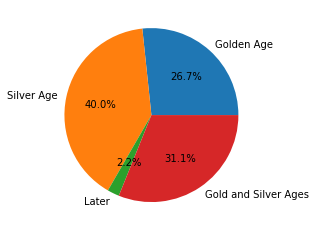

In [61]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

In [62]:
labels = "Golden Age", "Silver Age", "Later", "Gold and Silver Ages"
G = len(gladius[gladius.era=='Golden Age'])
S = len(gladius[gladius.era=='Silver Age'])
L = len(gladius[gladius.era=='Later'])
GaS = len(gladius[gladius.era=='Gold and Silver Ages'])
nums = [G, S, L, GaS]

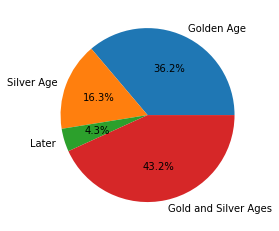

In [63]:
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

In [64]:
#lets look through author usages now:
print(set(df_swords.author))#all the authors that use a sword word
print(len(set(df_swords.author))) #that would be all 31, according to the set difference check below

{'PHAEDR', 'FLOR', 'P. OVIDIVS NA', 'SILIVS ITALIC', 'T. LIVI', 'C. SALLVSTIVS CRISP', 'T. MACCIVS PLAVT', 'EVTROPI', 'ALBIVS TIBVLL', 'GAIVS VALERIVS FLACC', 'CORNELIVS NEP', 'C. PLINIVS CAECILIVS SECVND', 'M. VITRVVIVS POLL', 'C. IULIUS CAES', 'P. TERENTIVS AF', 'M. PORCIVS CATO CENS', 'none', 'C. PETRONI', 'L. ANNAEVS SENE', 'P. VERGILIVS MA', 'AVLVS GELLI', 'M. TVLLIVS CICE', 'C. SVETONIVS TRANQVILL', 'M. TERENTIVS VAR', 'SCRIPTORES HISTORIAE AVGVST', 'L. ANNAEVS SENECA MAI', 'PVBLIVS PAPINIVS STATI', 'SEXTVS PROPERTI', 'TITVS LVCRETIVS CAR', 'P. CORNELIVS TACIT', 'M. FABIVS QVINTILIAN'}
31


In [65]:
x = set(df_swords.author)
y = set(latlib_df.author)
z = x.difference(y)
print(z) #yep, every author uses a sword word in at least one work!

set()


In [100]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [121]:
for x in df_swords.tokens:
    bigram = list(nltk.bigrams(x))
    word_fd = nltk.FreqDist(x)
    bigram_fd = nltk.FreqDist(nltk.bigrams(x))
    finder = BigramCollocationFinder(word_fd, bigram_fd)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    sorted(bigram for bigram, score in scored)
    glad = [(gram, bigram_fd[gram]) for gram in bigram_fd if gram[0] == 'gladius' or gram[0] == 'gladii' or gram[0] == 'gladi' or gram[0] == 'gladio' or gram[0] == 'gladium' or gram[0] == 'gladie' or gram[0] == 'gladiorum' or gram[0] == 'gladiis' or gram[0] == 'gladios' or gram[1] == 'gladius' or gram[1] == 'gladii' or gram[1] == 'gladi' or gram[1] == 'gladio' or gram[1] == 'gladium' or gram[1] == 'gladie' or gram[1] == 'gladiorum' or gram[1] == 'gladiis' or gram[1] == 'gladios']
    print(glad)

AttributeError: 'list' object has no attribute 'most_common'

final stat overview & save updated examples out:

In [ ]:
latlib_df.describe()

In [ ]:
#updated data samples so they reflect my current data:
examples = latlib_df.head(10)
examples.to_pickle("/Users/francesharrington/Documents/ling1340/Latin-Vocabulary-Analysis/data_samples/examples.pkl")